In [ ]:
from PIL import Image, ImageDraw, ImageTk
import io
import numpy as np
from kraken import blla

from tkinter import *
from tkinter import ttk

In [2]:
test = Image.open("../temp_img/temp_image.jpg")

In [3]:
baseline_seg = blla.segment(test)

In [15]:
def cut_out_line(image, points) -> Image:

    """
    Takes the mask of the text, adds an alpha channel and cuts the page so only the text and its surroundings are kept
    """
    
    copy_image = image.copy()
    #black background
    mask = Image.new("L",copy_image.size,0)
    #white poligon
    draw = ImageDraw.Draw(mask)
    draw.polygon(points, 255, width=1)
    #make array
    mask_a = np.array(mask)
    #add alpha channel
    copy_image.putalpha(mask)
    #crop
    y_min = min(np.where(mask_a == 255)[0])
    x_min = min(np.where(mask_a == 255)[1])
    y_max = max(np.where(mask_a == 255)[0])
    x_max = max(np.where(mask_a == 255)[1])
    copy_image = copy_image.crop([x_min,y_min,x_max,y_max])
    
    return copy_image

In [5]:

#go through alls
for line in baseline_seg.lines:
    pic_copy = test.copy()
    img1 = ImageDraw.Draw(pic_copy)  
    img1.polygon(line.boundary, outline ="blue") 
    pic_copy.show()


In [18]:
line_cutouts = []
for line in baseline_seg.lines:
    temp_img = cut_out_line(test,line.boundary)
    line_cutouts.append(temp_img)
    



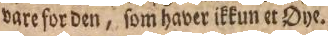

In [ ]:
#for each page gather
# poligon coords
# pict
# text

#display full pict with coords + small extract + intake text
#make it possible to toggle with keys -> <- 


In [7]:
from tkinter import *
from tkinter import ttk

def calculate(*args):
    try:
        value = float(feet.get())
        meters.set(round(0.3048 * value, 4))
    except ValueError:
        pass

#init
root = Tk()
root.title("Feet to Meters")

#frame inside window
mainframe = ttk.Frame(root, padding=(3, 3, 12, 12))
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))

#text field
feet = StringVar()
feet_entry = ttk.Entry(mainframe, width=7, textvariable=feet)
feet_entry.grid(column=2, row=1, sticky=(W, E))

#rest
meters = StringVar()
ttk.Label(mainframe, textvariable=meters).grid(column=2, row=2, sticky=(W, E))

ttk.Button(mainframe, text="Calculate", command=calculate).grid(column=3, row=3, sticky=W)

ttk.Label(mainframe, text="feet").grid(column=3, row=1, sticky=W)
ttk.Label(mainframe, text="is equivalent to").grid(column=1, row=2, sticky=E)
ttk.Label(mainframe, text="meters").grid(column=3, row=2, sticky=W)

#polish
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)	
mainframe.columnconfigure(2, weight=1)
for child in mainframe.winfo_children(): 
    child.grid_configure(padx=5, pady=5)
feet_entry.focus()
root.bind("<Return>", calculate)

root.mainloop()

In [5]:
from tkinter import *
from tkinter import ttk

In [6]:
from PIL import ImageTk

In [7]:
def disp_line_image(parent,c,r,tkimage:PhotoImage):
    #convert before !!!!
    #basic frame
    im_line_frame = ttk.Frame(parent, padding=5)
    im_line_frame.grid(column=c, row=r, sticky=(N,W,E,S))
    im_line_frame.columnconfigure(0, weight=1)
    im_line_frame.rowconfigure(0, weight=1)
    #display
    lab = ttk.Label(im_line_frame, image=tkimage)
    lab.grid(column=0, row=0, sticky=(W, E))

In [8]:
boundary_list = [i.boundary for i in baseline_seg.lines]

In [9]:
#create a canvas that is the same size as the right frame will be based on nr_lines
#put it under right frame?
def scrollable_frame(parent,c,r):
    #create canvas from parent
    canvas = Canvas(parent)
    canvas.grid(column=c,row=r,sticky="news")
    #add scrollbar
    scrollbar = Scrollbar(parent, orient=VERTICAL, command=canvas.yview)
    scrollbar.grid(column=c+1,row=r,sticky="ns")
    #link canvas to scrollbar
    canvas.configure(yscrollcommand=scrollbar.set)
    #bind to frame
    s_frame = Frame(canvas)
    canvas.create_window((0, 0), window=s_frame, anchor="nw")
    s_frame.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))
    
    return s_frame


In [48]:
def transcribe_line(parent,c,r,val_list,*args):
    
    def assign_line(*args):
            try:
                value = ef_var.get()
                val_list[r] = value
                lab_var.set(value)
            except ValueError:
                pass

        #basic frame
    line_frame = ttk.Frame(parent, padding=5)
    line_frame.grid(column=c, row=r, sticky=(N,W,S))
    line_frame.columnconfigure(0, weight=1)
    line_frame.rowconfigure(0, weight=1)
        #entry field
    ef_var = StringVar()
    ef = ttk.Entry(line_frame, textvariable=ef_var)
    ef.grid(column=1, row=0, sticky=(W, E))
        #Button
    lab_var = StringVar()
    butt = ttk.Button(line_frame, text='set', command=assign_line)
    butt.grid(column=2, row=0, sticky=(W, E))
        # pressing return
    ef.bind('<Return>', assign_line)
        #display
    lab = ttk.Label(line_frame, textvariable=lab_var)
    lab.grid(column=0, row=0, sticky=(W, E))

    #change image?
    ef.bind("<FocusIn>", lambda e: full_page.configure(image=highlight(e,boundary_list,test)))
    #return the entry field to allow movement
    return ef
    
#highlight text line
def highlight_on_page(page,bounds):
    pic_copy = page.copy()
    img1 = ImageDraw.Draw(pic_copy)  
    img1.polygon(bounds, outline ="blue")
    return pic_copy

In [50]:
#frame
#init
window = Toplevel()
window.title("title")
#frame inside window
mainframe = ttk.Frame(window, padding=5)
mainframe.grid(column=0, row=0, sticky=(N,W,E,S))
#separate to left and right
left_frame = ttk.Frame(mainframe, padding=5)
left_frame.grid(column=2, row=0, sticky="news")
#scrollable?
right_frame = scrollable_frame(mainframe, c=0, r=0)

n_lines = len(line_cutouts)

#full page for ref
tkfp = ImageTk.PhotoImage(test)
full_page = ttk.Label(left_frame,padding=5,image=tkfp)
#full_page = ttk.Label(left_frame,padding=5,text="testing")
full_page.grid(column=0, row=0, sticky=(N,W,S,E))

#convert images for display
tkimlist = [ImageTk.PhotoImage(i) for i in line_cutouts]
#the typed transcripted lines by the user
val_list = [" " for i in range(n_lines)]
#for movement by arrow keys
line_efs = []
#for highlighting text on the page 

for idx_i, i in enumerate(line_cutouts):
    #line
    line_ef = transcribe_line(right_frame,1,idx_i,val_list)
    #keep the entry field vars to allow movement
    line_efs.append(line_ef)
    #image
    disp_line_image(right_frame,0,idx_i,tkimlist[idx_i])
    

#movement across lines
def move_in_direction(event,direction,line_efs):
    current_line = right_frame.focus_get()
    pos_c_line = line_efs.index(current_line)
    if direction == "up":
        line_efs[pos_c_line-1].focus_set()
    elif direction == "down":
        line_efs[pos_c_line+1].focus_set()
right_frame.bind_all("<Down>", lambda e: move_in_direction(e,"down",line_efs))
right_frame.bind_all("<Up>", lambda e: move_in_direction(e,"up",line_efs))

#highlight on page
def highlight(event,boundary_list,page):
    #determine active line
    current_line = right_frame.focus_get()
    pos_c_line = line_efs.index(current_line)
    #create pic with according boundary
    h_im = highlight_on_page(page,boundary_list[pos_c_line])
    tkh_im = ImageTk.PhotoImage(h_im)
    return tkh_im

#def change_label(event):
#    #determine active line
#    current_line = right_frame.focus_get()
#    pos_c_line = line_efs.index(current_line)
#    c_lin_str = f"{current_line} is active"
#    return c_lin_str

#full_page.bind("<FocusIn>", lambda e: full_page.configure( image=highlight(e,boundary_list,test)))

#resizes
window.columnconfigure(0, weight=1)
window.rowconfigure(0, weight=1)
mainframe.columnconfigure(0, weight=1)
mainframe.rowconfigure(0, weight=1)
left_frame.columnconfigure(0, weight=1)
left_frame.rowconfigure(0, weight=1)
right_frame.columnconfigure(0, weight=1)
right_frame.rowconfigure(0, weight=1)


window.mainloop()

In [295]:
val_list

['a',
 'asdf',
 'ffff',
 'asdfggas',
 'asdfaffaw',
 'adwadsadwfafafw',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']